In [2]:
# Libreries for resolve sys modules
import os
import sys

In [3]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from src.core import config
from sklearn.model_selection import train_test_split

In [5]:
# Load data with pandas
fashion = pd.read_csv(config.FASHION_TRAIN_DATA_PATH, dtype_backend='pyarrow') # pyarrow for lower resources consumtion
mnist = pd.read_csv(config.MNIST_TRAIN_DATA_PATH, dtype_backend='pyarrow')

In [6]:
fashion.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64[pyarrow](785)
memory usage: 119.8 MB


In [9]:
fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64[pyarrow](785)
memory usage: 359.3 MB


In [10]:
division = 0.16666666666666667 # This ensure a division of exactly 10k samples

In [11]:
# Split validation data
f_x_train, f_x_val, f_y_train, f_y_val = train_test_split(fashion.drop(columns=['label']), fashion['label'],test_size=division, stratify=fashion['label'], random_state=9)

m_x_train, m_x_val, m_y_train, m_y_val = train_test_split(mnist.drop(columns=['6']), mnist['6'],test_size=.25, stratify=mnist['6'], random_state=9)

In [12]:
# Concat dfs
fashion_df_val = pd.concat([f_y_val, f_x_val], axis=1).reset_index(drop=True)
mnist_df_val = pd.concat([m_y_val, m_y_val], axis=1).reset_index(drop=True)

In [13]:
# Export split to correct directory
fashion_df_val.to_csv(config.FASHION_VALIDATION_DATA_PATH, index=False)
mnist_df_val.to_csv(config.MNIST_VALIDATION_DATA_PATH, index=False)

In [14]:
# Show a sample of the data
def show_image(image:np.ndarray):
    try:
        image = image.reshape(28,28)
    except Exception as e:
        print(f'Can\'t reshape (28,28) the image with shape {image.shape}: ', e)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [38]:
f_x_val.iloc[0,:].values.shape

(784,)

Fashion Mnist:


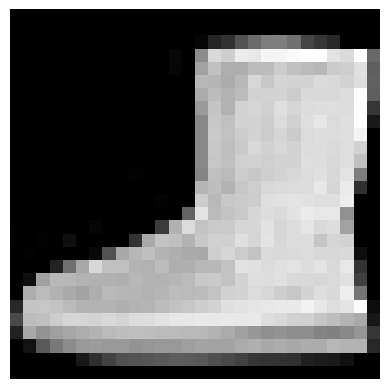

Mnist:


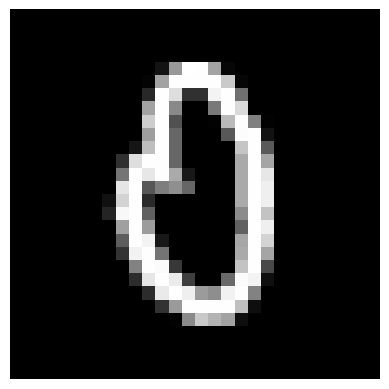

In [68]:
# Generate a random index 
f_idx = np.random.randint(0,f_x_val.shape[0])
m_idx = np.random.randint(0,m_x_val.shape[0])

# Select a random image and draw it
f_img = np.array(f_x_val.iloc[f_idx,:].values)
print('Fashion Mnist:')
show_image(f_img)

m_img = np.array(m_x_val.iloc[m_idx,:].values)
print('Mnist:')
show_image(m_img)